In [ ]:
# importowanie bibliotek i ustawianie formatowania wyświetlania danych
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

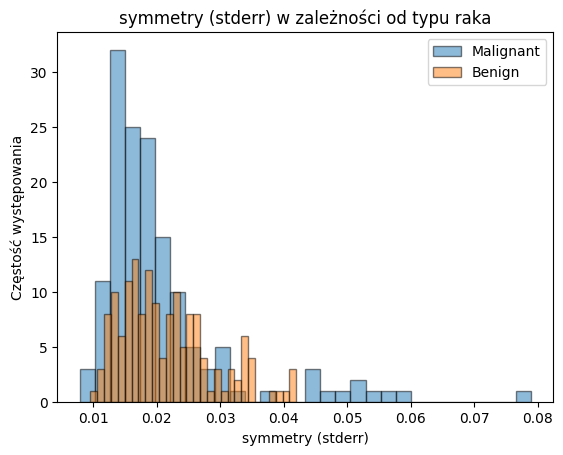

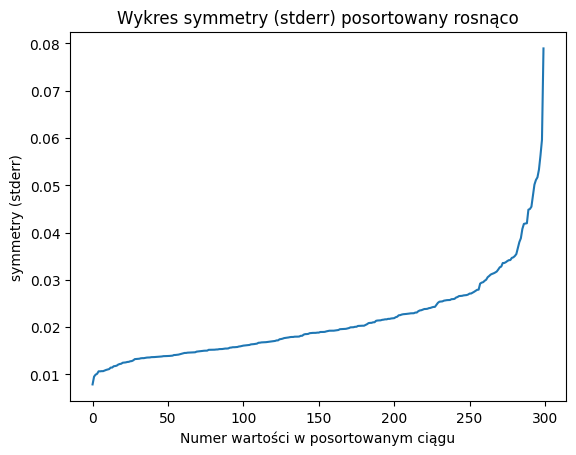

In [ ]:
class CancerAnalysis:
    # zmienne
    breast_labels : pd.DataFrame
    breast_train : pd.DataFrame
    breast_validate : pd.DataFrame

    def read_data(self):
        self.breast_labels : pd.DataFrame = pd.io.parsers.read_csv("dataset\\breast-cancer.labels", header=None)[0].tolist()
        self.breast_train : pd.DataFrame = pd.io.parsers.read_csv("dataset\\breast-cancer-train.dat", header=None)
        self.breast_validate : pd.DataFrame = pd.io.parsers.read_csv("dataset\\breast-cancer-validate.dat", header=None)
        self.breast_train.columns = self.breast_labels    # adding labels to data

    def _ex_b_hist(self, analyzed_feature : str):
        # Filtrowanie danych dla obu typów
        malignant = self.breast_train[self.breast_train["Malignant/Benign"] == "M"][analyzed_feature]
        benign = self.breast_train[self.breast_train["Malignant/Benign"] == "B"][analyzed_feature]
        # Rysowanie histogramów
        plt.hist(malignant, bins=30, alpha=0.5, label="Malignant", edgecolor='black')
        plt.hist(benign, bins=30, alpha=0.5, label="Benign", edgecolor='black')
        plt.xlabel(analyzed_feature)
        plt.ylabel("Częstość występowania")
        plt.title(f"{analyzed_feature} w zależności od typu raka")
        plt.legend()
        plt.show()
    
    def _ex_b_plot(self, analyzed_feature : str):
        self.read_data()
        sorted_feature = self.breast_train[analyzed_feature].sort_values().reset_index(drop=True)   # reset_index przywraca indeksowanie pokolei 
        ax2 = sorted_feature.plot()
        ax2.set_xlabel("Numer wartości w posortowanym ciągu")
        ax2.set_ylabel(analyzed_feature)
        ax2.set_title(f"Wykres {analyzed_feature} posortowany rosnąco")
        plt.show()

    def ex_b(self, analyzed_feature : str = 'radius (mean)'):
        '''
            Można wybrać analizowaną cechę spośród:
            'radius (mean)', 'texture (mean)', 'perimeter (mean)', 'area (mean)', 'smoothness (mean)', 'compactness (mean)', 
            'concavity (mean)', 'concave points (mean)', 'symmetry (mean)', 'fractal dimension (mean)', 'radius (stderr)', 
            'texture (stderr)', 'perimeter (stderr)', 'area (stderr)', 'smoothness (stderr)', 'compactness (stderr)', 
            'concavity (stderr)', 'concave points (stderr)', 'symmetry (stderr)', 'fractal dimension (stderr)', 'radius (worst)', 
            'texture (worst)', 'perimeter (worst)', 'area (worst)', 'smoothness (worst)', 'compactness (worst)', 'concavity (worst)', 
            'concave points (worst)', 'symmetry (worst)', 'fractal dimension (worst)'
        '''
        self.read_data() # zapewnienie że dane są pobrane       TODO jeśli nie będą nigdzie modyfikowane to można zmienić na wczytywanie tylko przy __init__()
        self._ex_b_hist(analyzed_feature)
        self._ex_b_plot(analyzed_feature)

Analysis = CancerAnalysis()
Analysis.ex_b("symmetry (stderr)")
